In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data=pd.read_csv('bank-full.csv',delimiter=';')

In [83]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [85]:
data.shape

(45211, 17)

In [86]:
data.duplicated().sum()

0

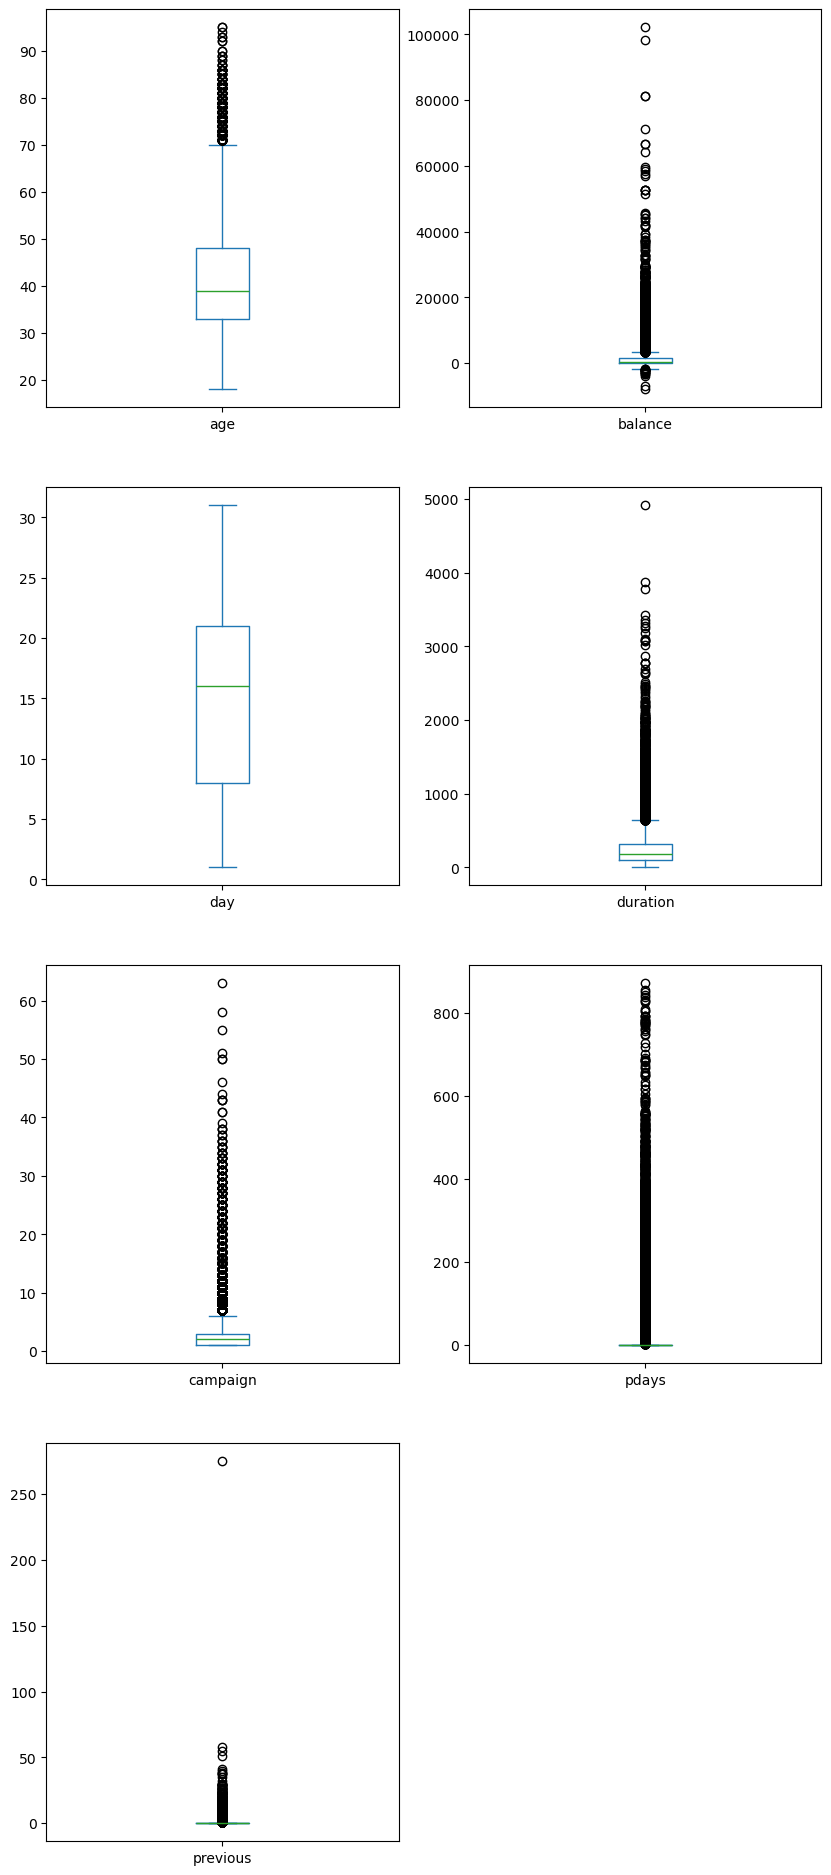

In [87]:
# Checking for outliers
data.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

In [88]:
columns = ['age', 'campaign', 'duration']

for column in columns:
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter the DataFrame for the current column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [89]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,38690.000000,38690.000000,38690.000000,38690.00000,38690.000000,38690.000000,38690.000000
mean,40.525821,1336.622874,15.530344,207.92197,2.129181,42.213001,0.596278
std,10.008209,2993.591977,8.270187,140.24062,1.319732,102.458749,2.364681
min,18.000000,-8019.000000,1.000000,0.00000,1.000000,-1.000000,0.000000
25%,32.000000,71.000000,8.000000,103.00000,1.000000,-1.000000,0.000000
50%,39.000000,439.000000,16.000000,171.00000,2.000000,-1.000000,0.000000
75%,48.000000,1400.000000,21.000000,281.00000,3.000000,-1.000000,0.000000
max,70.000000,102127.000000,31.000000,645.00000,6.000000,871.000000,275.000000


In [90]:
#Checking categorical features
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [91]:
#Checking for null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [92]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [93]:
categorical_features=[feature for feature in data.columns if ((data[feature].dtypes!='object') & (feature not in ['deposit']))]
print("Non object types")
categorical_features

Non object types


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

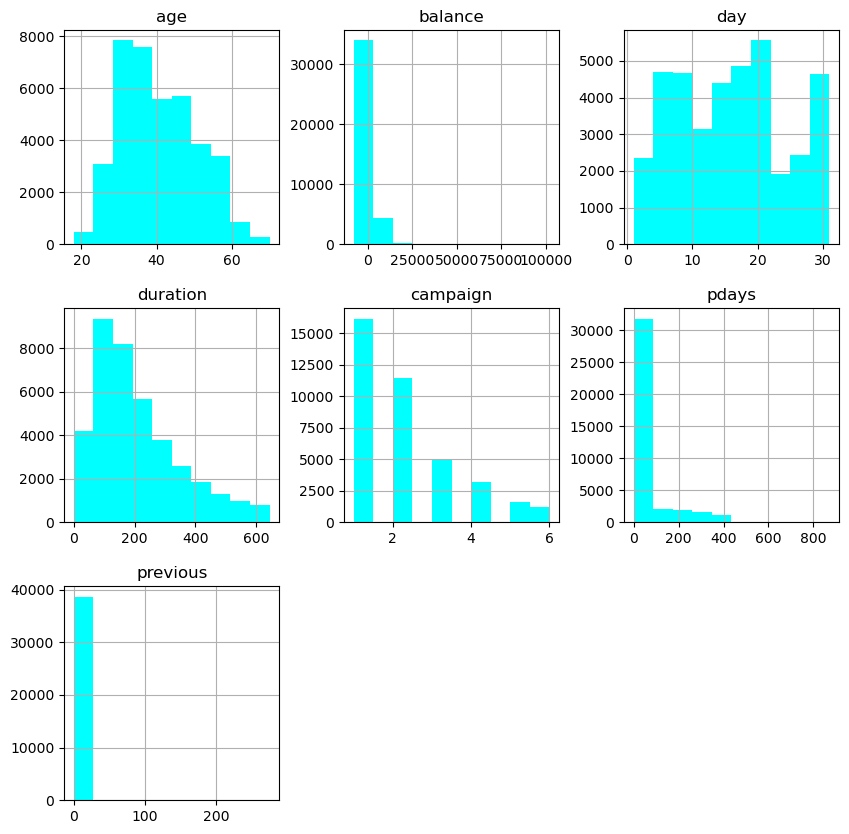

In [94]:
data.hist(figsize=(10,10),color="#00ffff")
plt.show()

In [95]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [96]:
lb=LabelEncoder()
data_encoded=data.apply(lb.fit_transform)
data_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,2977,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,899,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,872,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2371,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,871,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,16,0,2,1,0,1427,0,0,0,16,9,224,0,0,0,3,1
45203,5,8,2,2,0,983,0,0,0,16,9,266,0,0,0,3,1
45205,7,9,2,1,0,1375,0,1,0,16,9,386,1,0,0,3,1
45209,39,1,1,1,0,1538,0,0,1,16,9,508,3,0,0,3,0


In [98]:
data_encoded['y'].value_counts(normalize=True)*100

y
0    91.240631
1     8.759369
Name: proportion, dtype: float64

In [99]:
## independent variables
x = data_encoded.iloc[:,:-1] 


In [100]:
## Target variable
y = data_encoded.iloc[:,-1]  

In [101]:
y.shape

(38690,)

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27083, 16)
(11607, 16)
(27083,)
(11607,)


In [103]:
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [104]:
print("Training accuracy:",dc.score(x_train,y_train))
print("Testing accuracy:",dc.score(x_test,y_test))

Training accuracy: 0.925931396078721
Testing accuracy: 0.9290945119324545


In [105]:
y_pred=dc.predict(x_test)

In [106]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9290945119324545


In [107]:
print(confusion_matrix(y_test,y_pred))

[[10469   118]
 [  705   315]]


In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10587
           1       0.73      0.31      0.43      1020

    accuracy                           0.93     11607
   macro avg       0.83      0.65      0.70     11607
weighted avg       0.92      0.93      0.92     11607



In [109]:
from sklearn.tree import plot_tree

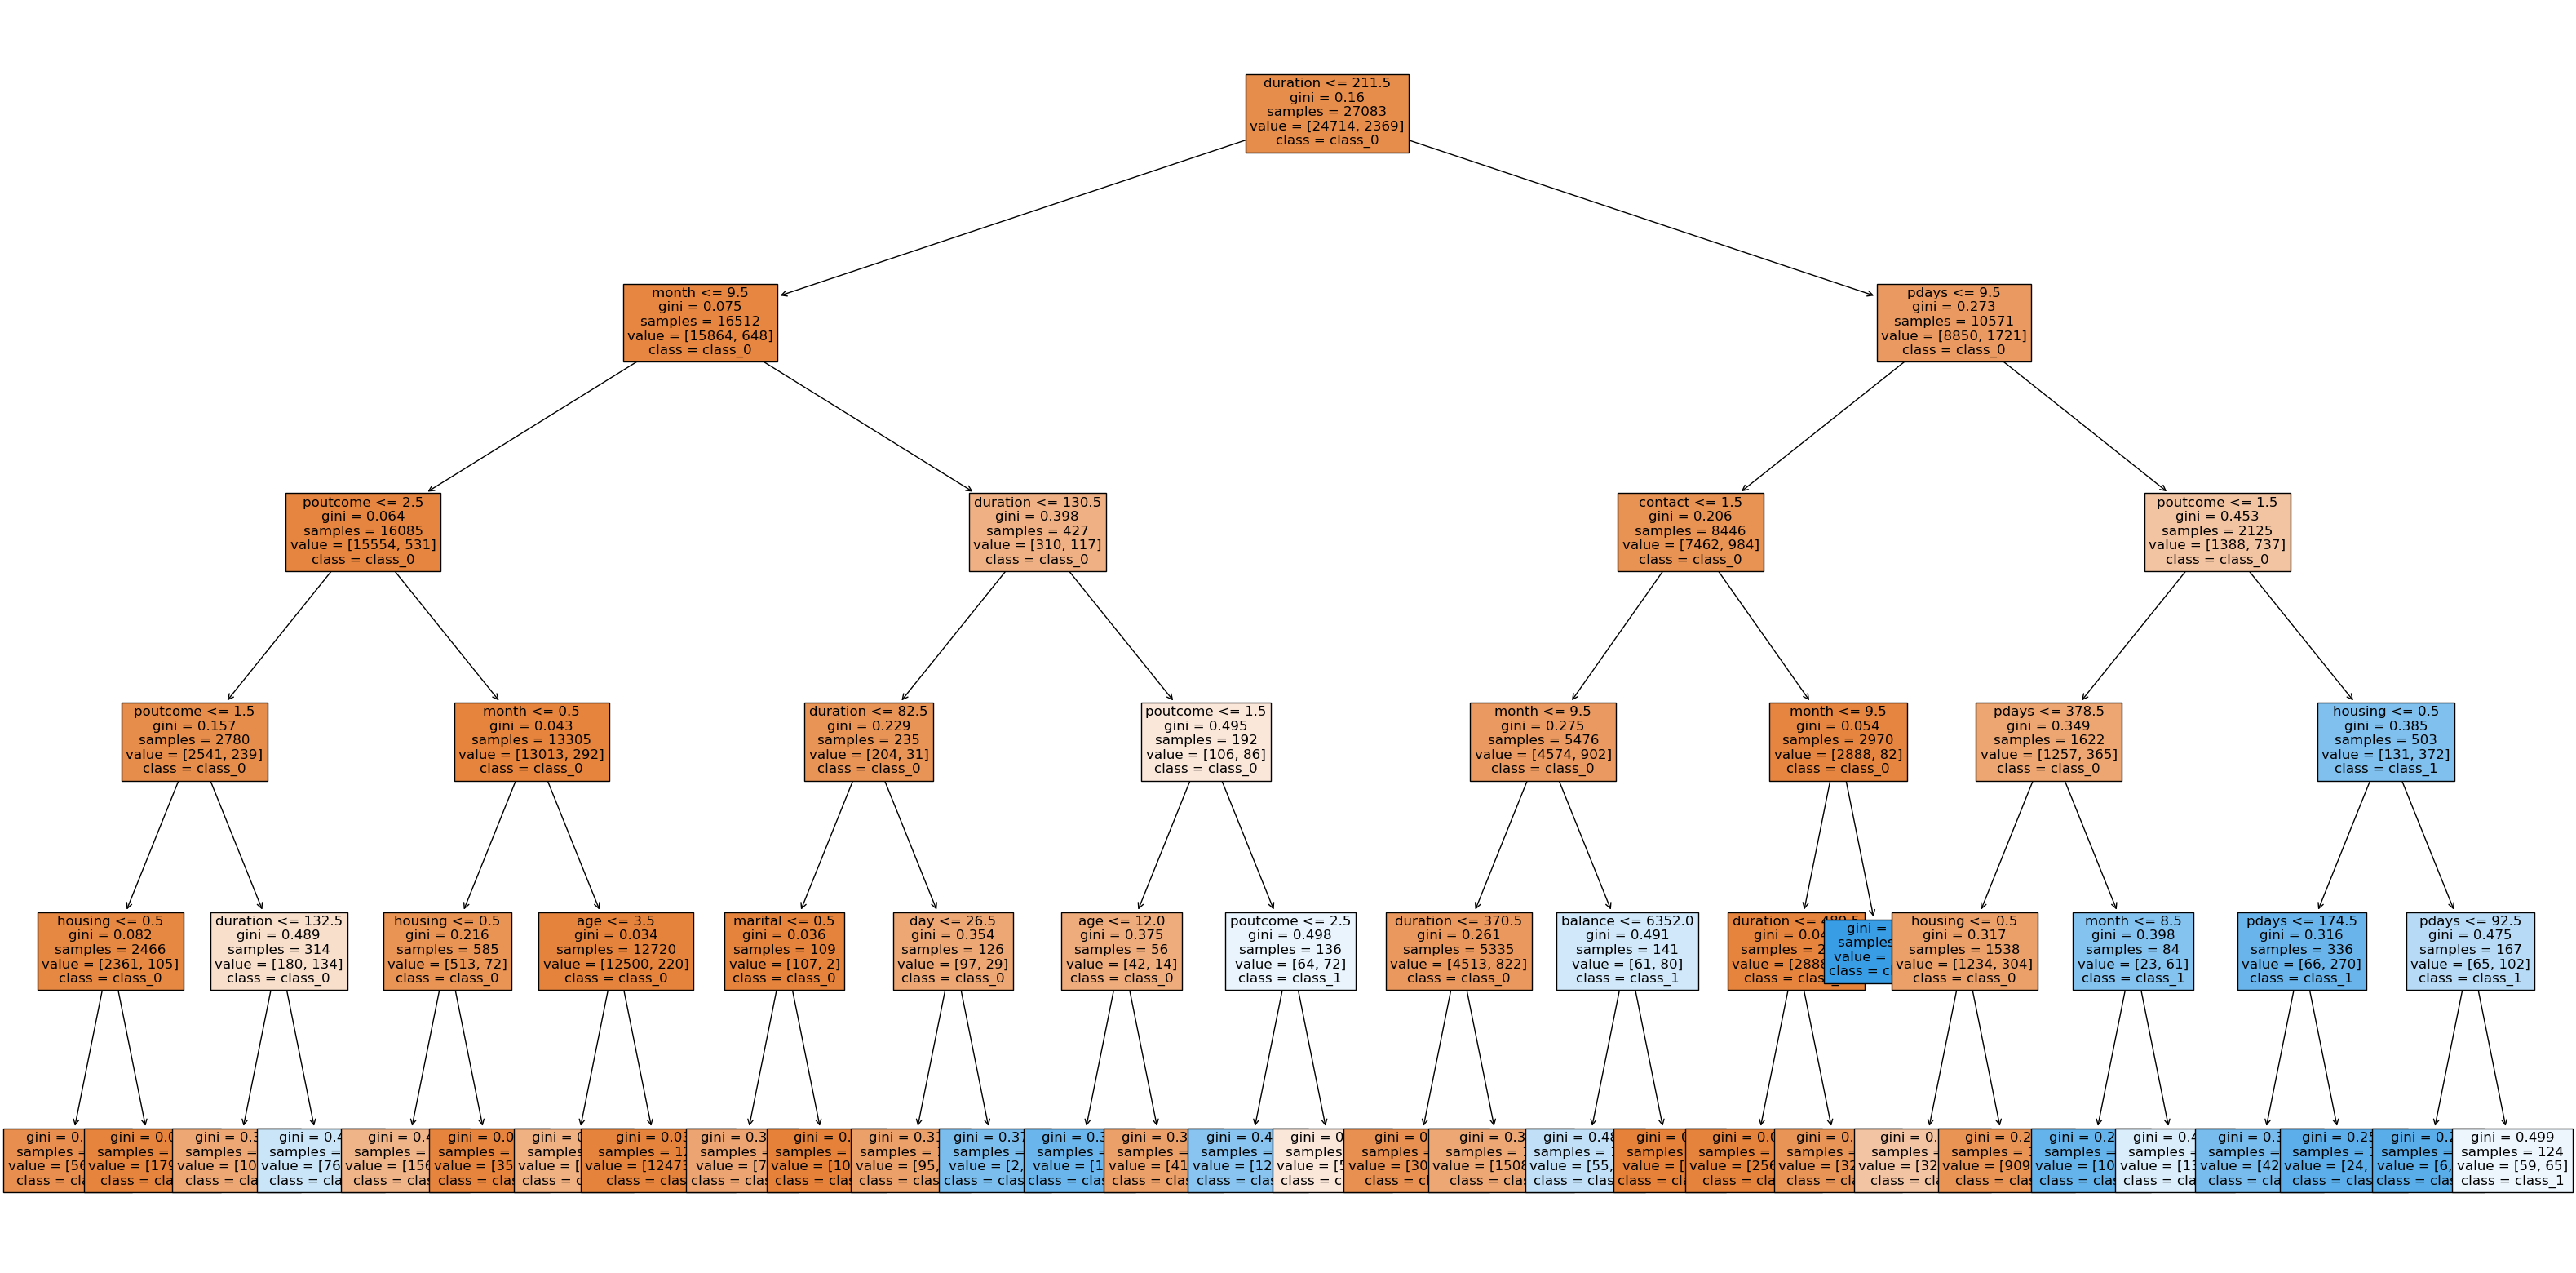

In [110]:
feature_names=data.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()

In [111]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [112]:
print("Training accuracy:",dc1.score(x_train,y_train))
print("Testing accuracy:",dc1.score(x_test,y_test))

Training accuracy: 0.9176236015212494
Testing accuracy: 0.9178943740846042
